Import relevant packages.

In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

Read all csvs to a dataframe. There are seven csv files, one for each date from 20 Nov to 27 Nov

In [12]:
dataframe = {}

for date in range(20, 21):
    file = "data/" + str(date) +"_nov_archive.csv"
    df = pd.read_csv(file)
    key = str("df_" + str(date) + "_nov")
    dataframe[key] = df

To get rid of spam, only the data with tweets from accounts with over 20 followers is kept. 

In [ ]:
for date in dataframe:
    if dataframe[date]["user_follower_count"] < 20:
        

In [3]:
print(dataframe["df_20_nov"].head())

                id_str        from_user  \
0  1594480667953225728      ShelMcMahon   
1  1594480599284080640  JoyceBo54010493   
2  1594480599078555649         kino5336   
3  1594480588982919168         kino5336   
4  1594480580397502464          MadamW9   

                                                text  \
0  RT @gtconway3d: Blah blah Hunter Biden tried t...   
1  RT @TPostMillennial: Rep. Jim Jordan SLAMS the...   
2  RT @val_gratias: @TheFungi669 Hunter Biden’s l...   
3  RT @TheFungi669: You know, I’m not sure if Hun...   
4  RT @NeuroSpark: The thing about Hunter Biden’s...   

                       created_at                 time  geo_coordinates  \
0  Sun Nov 20 23:59:49 +0000 2022  20/11/2022 23:59:49              NaN   
1  Sun Nov 20 23:59:33 +0000 2022  20/11/2022 23:59:33              NaN   
2  Sun Nov 20 23:59:33 +0000 2022  20/11/2022 23:59:33              NaN   
3  Sun Nov 20 23:59:31 +0000 2022  20/11/2022 23:59:31              NaN   
4  Sun Nov 20 23:59:29 +0000 

Visualise the column in the dataframe that contain the text of the tweets. Add the 'RT' to the list of words to not include it in the wordcloud since all retweets have that at the start of the text. Also exclude 'Hunter Biden laptop' as all tweets would have that term as that was the condition.

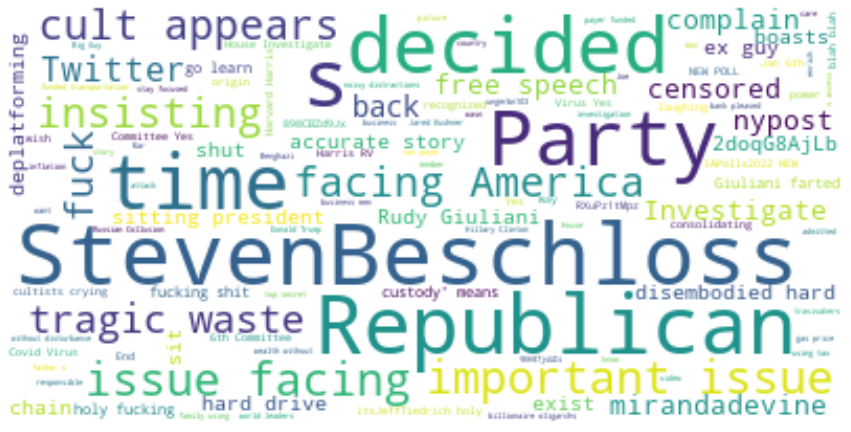

In [8]:
def gen_wordcloud(date): 
    text = " ".join(i for i in date["text"])

    stopwords = set(STOPWORDS)
    stopwords.update(["RT", "Hunter", "Biden", "laptop", "https", "t", "co"])

    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

for date in dataframe:
    gen_wordcloud(dataframe[date])